# Patat : Plateforme Agnostique de Traitement et d'Analyse des Textes

### Notebook 5 : Exemple complet
Entrainement d'un prédicteur pour savoir si un article de France Soir vient de l'AFP ou pas.

### To Do
Ajouter identification des features qui ont permi la prédiction
Tester sur des articles d'autres sources


In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd

## Construction du corpus

### Récupération des articles de Francesoir sur corpus

In [3]:
df_corpus = pd.read_csv('data/corpus/220314-CorpusArticles.csv')

In [4]:
df_francesoir = df_corpus[df_corpus['source']=='fsoir']

In [5]:
df_francesoir.shape

(13614, 9)

In [9]:
df_francesoir['url'][13]

'https://www.francesoir.fr/afp-afp/france-legislatives-en-colombie-en-attendant-la-presidentielle'

In [10]:
df_francesoir

,source,url,categories,title,author,date_published,article,category,origin_url
13,fsoir,https://www.francesoir.fr/afp-afp/france-legis...,NaN,"Législatives en Colombie, en attendant la prés...",Par Héctor Velasco - Bogota (AFP),2022-03-13T02:14:46+01:00,© Juan BARRETO / AFP\nPrès de 39 millions de C...,NaN,NaN
24,fsoir,https://www.francesoir.fr/afp-afp/france-chili...,NaN,Chili: le président Boric entame son mandat en...,Par AFP - Santiago du Chili,2022-03-12T21:20:59+01:00,© - / Presidencia de Chile/AFP\nPour son premi...,NaN,NaN
25,fsoir,https://www.francesoir.fr/afp-afp/france-balad...,NaN,Balade en tramway par temps de guerre dans Kie...,Par Dmitry ZAKS - Kiev (AFP),2022-03-12T21:17:08+01:00,© Aris Messinis / AFP\nAu volant de son tramwa...,NaN,NaN
26,fsoir,https://www.francesoir.fr/afp-afp/france-dans-...,NaN,"Dans le Sud-Ouest, Zemmour met en scène un ral...",Par Gregory DANEL - Agen (AFP),2022-03-12T17:44:46+01:00,© Valentine CHAPUIS / AFP\nVisé dès son arrivé...,NaN,NaN
27,fsoir,https://www.francesoir.fr/politique-monde/la-h...,NaN,La Hongrie compte maintenir ses importations d...,FranceSoir,2022-03-12T17:00:34+01:00,TOBIAS SCHWARZ / AFP\nLa Hongrie ne compte pas...,NaN,NaN
...,...,...,...,...,...,...,...,...,...
28727,fsoir,https://www.francesoir.fr/lifestyle-vie/quotid...,NaN,"Pourquoi ""toucher du bois"" porte-t-il chance?",VL,2015-01-02T17:06:29+01:00,©Flickr Creative Commons\nToucher du bois de l...,NaN,NaN
28771,fsoir,https://www.francesoir.fr/culture-medias/novem...,NaN,Novembre 1954: Gaston Dominici condamné à mort...,Jean-Michel Comte,2014-11-25T18:26:41+01:00,"©DR\nLe 28 novembre 1954, Gaston Dominici est ...",NaN,NaN
28779,fsoir,https://www.francesoir.fr/culture-medias/le-22...,NaN,"Le 22 novembre 1963, l'assassinat de Kennedy (...",Jean-Michel Comte,2014-11-19T18:58:58+01:00,"©DR\nLe 22 novembre 1963, John F. Kennedy étai...",NaN,NaN
28804,fsoir,https://www.francesoir.fr/lifestyle-tourisme/z...,NaN,Zoo d'Amnéville: le tigre comme moteur,Pierre Plottu,2014-10-27T14:38:07+01:00,test\nNé il y a moins de trente ans de la pass...,NaN,NaN


### Détection "à la main" des articles de l'AFP

In [11]:
def is_afp(author):
    return 'afp' in author.lower()

In [12]:
df_afp = pd.DataFrame(df_francesoir['author'].apply(is_afp))
df_afp.rename(columns = {'author':'afp'}, inplace = True)
df_francesoir=pd.concat([df_francesoir,df_afp],axis='columns')

In [13]:
df_francesoir

,source,url,categories,title,author,date_published,article,category,origin_url,afp
13,fsoir,https://www.francesoir.fr/afp-afp/france-legis...,NaN,"Législatives en Colombie, en attendant la prés...",Par Héctor Velasco - Bogota (AFP),2022-03-13T02:14:46+01:00,© Juan BARRETO / AFP\nPrès de 39 millions de C...,NaN,NaN,True
24,fsoir,https://www.francesoir.fr/afp-afp/france-chili...,NaN,Chili: le président Boric entame son mandat en...,Par AFP - Santiago du Chili,2022-03-12T21:20:59+01:00,© - / Presidencia de Chile/AFP\nPour son premi...,NaN,NaN,True
25,fsoir,https://www.francesoir.fr/afp-afp/france-balad...,NaN,Balade en tramway par temps de guerre dans Kie...,Par Dmitry ZAKS - Kiev (AFP),2022-03-12T21:17:08+01:00,© Aris Messinis / AFP\nAu volant de son tramwa...,NaN,NaN,True
26,fsoir,https://www.francesoir.fr/afp-afp/france-dans-...,NaN,"Dans le Sud-Ouest, Zemmour met en scène un ral...",Par Gregory DANEL - Agen (AFP),2022-03-12T17:44:46+01:00,© Valentine CHAPUIS / AFP\nVisé dès son arrivé...,NaN,NaN,True
27,fsoir,https://www.francesoir.fr/politique-monde/la-h...,NaN,La Hongrie compte maintenir ses importations d...,FranceSoir,2022-03-12T17:00:34+01:00,TOBIAS SCHWARZ / AFP\nLa Hongrie ne compte pas...,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...
28727,fsoir,https://www.francesoir.fr/lifestyle-vie/quotid...,NaN,"Pourquoi ""toucher du bois"" porte-t-il chance?",VL,2015-01-02T17:06:29+01:00,©Flickr Creative Commons\nToucher du bois de l...,NaN,NaN,False
28771,fsoir,https://www.francesoir.fr/culture-medias/novem...,NaN,Novembre 1954: Gaston Dominici condamné à mort...,Jean-Michel Comte,2014-11-25T18:26:41+01:00,"©DR\nLe 28 novembre 1954, Gaston Dominici est ...",NaN,NaN,False
28779,fsoir,https://www.francesoir.fr/culture-medias/le-22...,NaN,"Le 22 novembre 1963, l'assassinat de Kennedy (...",Jean-Michel Comte,2014-11-19T18:58:58+01:00,"©DR\nLe 22 novembre 1963, John F. Kennedy étai...",NaN,NaN,False
28804,fsoir,https://www.francesoir.fr/lifestyle-tourisme/z...,NaN,Zoo d'Amnéville: le tigre comme moteur,Pierre Plottu,2014-10-27T14:38:07+01:00,test\nNé il y a moins de trente ans de la pass...,NaN,NaN,False


### Réduction de la taille du dataset pour les performances

In [ ]:
max_articles = 2000
df_francesoir = df_francesoir.sample(n=max_articles)

In [ ]:
df_francesoir[df_francesoir['afp']].shape

In [ ]:
df_francesoir['text'] = df_francesoir['title']+'\n'+df_francesoir['article']

## Analyse - Création des features

In [18]:
import patat.ml.spacy_analyser

In [19]:
importlib.reload(patat.ml.spacy_analyser)

<module 'patat.ml.spacy_analyser' from '/Users/fm/Desktop/Work/Patat/patat/ml/spacy_analyser.py'>

In [20]:
analyser = patat.ml.spacy_analyser.SpacyAnalyser()

Très long ! Presque 8 mn pour 2000 articles 50 minutes pour le corpus de 13000 articles

Sauter les deux lignes pour charger un fichier déjà calculé

In [ ]:
%%time
df_features = analyser.analyse_df(df_francesoir,'text')

In [ ]:
df_features.to_csv('data/corpus/220531-SpacyCorpusAfpComplet.csv',index=False)

In [14]:
df_features = pd.read_csv('data/corpus/220531-SpacyCorpusAfpComplet.csv')

In [15]:
df_features

,index,source,url,categories,title,author,date_published,article,category,origin_url,...,CCONJ,PRON,NUM,AUX,ADV,ADJ,SCONJ,SYM,X,INTJ
0,13,fsoir,https://www.francesoir.fr/afp-afp/france-legis...,NaN,"Législatives en Colombie, en attendant la prés...",Par Héctor Velasco - Bogota (AFP),2022-03-13T02:14:46+01:00,© Juan BARRETO / AFP\nPrès de 39 millions de C...,NaN,NaN,...,17,20,24,28,36,66,4,0,1,0
1,24,fsoir,https://www.francesoir.fr/afp-afp/france-chili...,NaN,Chili: le président Boric entame son mandat en...,Par AFP - Santiago du Chili,2022-03-12T21:20:59+01:00,© - / Presidencia de Chile/AFP\nPour son premi...,NaN,NaN,...,19,10,6,11,8,36,1,2,1,0
2,25,fsoir,https://www.francesoir.fr/afp-afp/france-balad...,NaN,Balade en tramway par temps de guerre dans Kie...,Par Dmitry ZAKS - Kiev (AFP),2022-03-12T21:17:08+01:00,© Aris Messinis / AFP\nAu volant de son tramwa...,NaN,NaN,...,20,73,9,18,33,34,11,0,1,0
3,26,fsoir,https://www.francesoir.fr/afp-afp/france-dans-...,NaN,"Dans le Sud-Ouest, Zemmour met en scène un ral...",Par Gregory DANEL - Agen (AFP),2022-03-12T17:44:46+01:00,© Valentine CHAPUIS / AFP\nVisé dès son arrivé...,NaN,NaN,...,17,32,9,26,27,31,4,0,1,0
4,27,fsoir,https://www.francesoir.fr/politique-monde/la-h...,NaN,La Hongrie compte maintenir ses importations d...,FranceSoir,2022-03-12T17:00:34+01:00,TOBIAS SCHWARZ / AFP\nLa Hongrie ne compte pas...,NaN,NaN,...,9,19,14,18,16,20,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13609,28727,fsoir,https://www.francesoir.fr/lifestyle-vie/quotid...,NaN,"Pourquoi ""toucher du bois"" porte-t-il chance?",VL,2015-01-02T17:06:29+01:00,©Flickr Creative Commons\nToucher du bois de l...,NaN,NaN,...,9,39,0,18,20,15,6,0,0,0
13610,28771,fsoir,https://www.francesoir.fr/culture-medias/novem...,NaN,Novembre 1954: Gaston Dominici condamné à mort...,Jean-Michel Comte,2014-11-25T18:26:41+01:00,"©DR\nLe 28 novembre 1954, Gaston Dominici est ...",NaN,NaN,...,26,39,39,41,38,61,2,0,1,0
13611,28779,fsoir,https://www.francesoir.fr/culture-medias/le-22...,NaN,"Le 22 novembre 1963, l'assassinat de Kennedy (...",Jean-Michel Comte,2014-11-19T18:58:58+01:00,"©DR\nLe 22 novembre 1963, John F. Kennedy étai...",NaN,NaN,...,16,50,30,31,35,35,9,1,0,0
13612,28804,fsoir,https://www.francesoir.fr/lifestyle-tourisme/z...,NaN,Zoo d'Amnéville: le tigre comme moteur,Pierre Plottu,2014-10-27T14:38:07+01:00,test\nNé il y a moins de trente ans de la pass...,NaN,NaN,...,29,59,33,37,69,60,9,0,0,0


In [21]:
feature_cols = analyser.feature_col_names()

In [22]:
feature_cols

['char_count',
 'word_count',
 'sentence_count',
 'PROPN',
 'PUNCT',
 'DET',
 'NOUN',
 'VERB',
 'ADP',
 'SPACE',
 'CCONJ',
 'PRON',
 'NUM',
 'AUX',
 'ADV',
 'ADJ',
 'SCONJ',
 'SYM',
 'X',
 'INTJ']

In [23]:
# A étudier : Mise à l'échelle des features par rapport au nombre de mots

In [24]:
# scale_features = [ 'PROPN','PUNCT','DET','NOUN','VERB','ADP','SPACE','CCONJ','PRON','NUM','AUX','ADV','ADJ','SCONJ','SYM','X','INTJ']


In [25]:
#for feature in scale_features:
#    df_features[feature]=df_features[feature]/df_features['word_count']

### Construction des Datasets d'entrainement et de test

In [26]:
import sklearn.model_selection

In [28]:
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(df_features,
                                             df_features['afp'],test_size=0.50,random_state=0)

### LogregPredictor

In [29]:
import patat.ml.predictor
import patat.ml.logreg_predictor

In [30]:
importlib.reload(patat.ml.predictor)
importlib.reload(patat.ml.logreg_predictor)

<module 'patat.ml.logreg_predictor' from '/Users/fm/Desktop/Work/Patat/patat/ml/logreg_predictor.py'>

In [31]:
logreg = patat.ml.logreg_predictor.LogregPredictor()

#### Entrainement du prédicteur

In [32]:
logreg.train(X_train,feature_cols,['afp'])

Training on afp


#### Prédictions

In [33]:
y_pred = logreg.predict_label(X_test,feature_cols,'afp')

In [35]:
y_proba = logreg.predict_proba_label(X_test,feature_cols,'afp')

#### Mesure des performances

In [36]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(X_test['afp'], y_pred)
print('Matrice de confusion')
print(cnf_matrix)
print(f'Accuracy score {metrics.accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Recall score {metrics.recall_score(y_test, y_pred)*100:.2f}%')

Matrice de confusion
[[4886  184]
 [ 256 1481]]
Accuracy score 93.54%
Recall score 85.26%


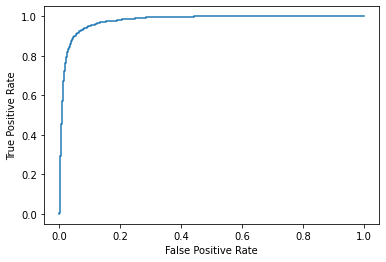

In [37]:
y_score = y_proba.transpose()[1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Gaussian Naive Bayes Predictor

In [ ]:
import patat.ml.gnb_predictor

importlib.reload(patat.ml.gnb_predictor)

gnb = patat.ml.gnb_predictor.GnbPredictor()

gnb.train(X_train,feature_cols,['afp'])

y_pred = gnb.predict_label(X_test,feature_cols,'afp')

y_proba = gnb.predict_proba_label(X_test,feature_cols,'afp')

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(X_test['afp'], y_pred)
print('Matrice de confusion')
print(cnf_matrix)
print(f'Accuracy score {metrics.accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Recall score {metrics.recall_score(y_test, y_pred)*100:.2f}%')
y_score = y_proba.transpose()[1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Structured Vector Classifier Predictor

In [ ]:
import patat.ml.svc_predictor
importlib.reload(patat.ml.svc_predictor)
svc = patat.ml.svc_predictor.SvcPredictor()
svc.train(X_train,feature_cols,['afp'])
y_pred = gnb.predict_label(X_test,feature_cols,'afp')

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(X_test['afp'], y_pred)
print('Matrice de confusion')
print(cnf_matrix)
print(f'Accuracy score {metrics.accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Recall score {metrics.recall_score(y_test, y_pred)*100:.2f}%')

## Bricolages

In [ ]:
df_features

In [ ]:
cd Work/Patat/